In [1]:
import matplotlib.pyplot as plt
# 한글처리
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [2]:
df_TOCC = pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


### <단일변수>
### Y:연속형 - 단일 변수에 대한 정규성 여부 판단
- 검증 레코드 갯수에 따른 방법 선택
    * 5,000개 이하 : shapiro normality test
    * 5,000개 이상 : Anderson normality test

#### 선정 변수 : age
- 분석 내용 : 나이가 정규 분포를 따르는가?
    - 귀무가설: 나이가 정규 분포이다.
    - 대립가설: 나이가 정규 분포가 아니다.
- 분석 결론 (기준 - P.value 0.05)
    - 통계 결론: 81.5 > 0.78(p.value 0.05)로 보아 대립가설이 참
    - 사실 결론: 나이가 정규 분포가 아니다.(비정규분포)

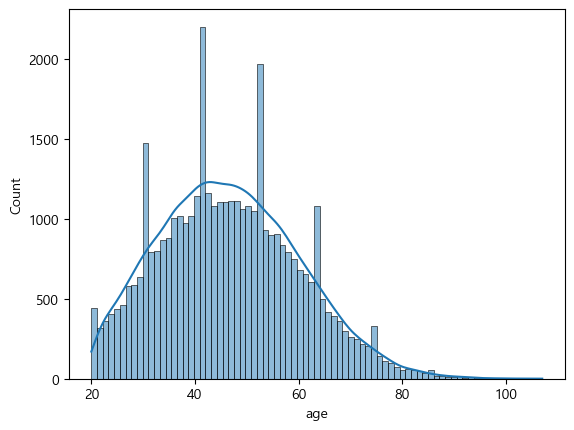

In [9]:
sns.histplot(data=df_TOCC, x='age', kde=True)
plt.show()

In [16]:
# 'age'의 null값 제거
df_age = df_TOCC['age'].dropna()

In [29]:
# s < cv : 정규분포, s > cv : 비정규
s, cv, sl = stats.anderson(df_age)
s, cv, sl

## index 중앙값을 선택해서 비교함
## 81.55 > 0.78 : 비정규분포에 해당

(81.5597210112901,
 array([0.576, 0.656, 0.787, 0.918, 1.092]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

#### 선정 변수 : Mileage[:200]
- 분석 내용 : 마일리지가 정규 분포를 따르는가?
    - 귀무가설: 마일리지가 정규 분포이다.
    - 대립가설: 마일리지가 정규 분포가 아니다.
- 분석 결론 (기준 - P.value 0.05)
    - 통계 결론: (statistic=0.98, pvalue=0.029)로 보아 대립가설이 참
    - 사실 결론: 마일리지가 정규 분포가 아니다.

In [30]:
df_TOCC_dropna = df_TOCC.dropna()[:500]
df_TOCC_dropna[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


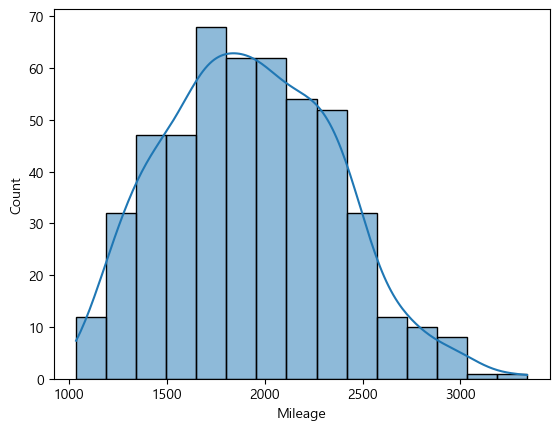

In [31]:
sns.histplot(data=df_TOCC_dropna, x='Mileage', kde=True)
plt.show()

In [28]:
stats.shapiro(df_TOCC_dropna['Mileage'])

ShapiroResult(statistic=0.9847697019577026, pvalue=0.029488753527402878)